![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [115]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [116]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [117]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [118]:
#DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [119]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [120]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [121]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [122]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [123]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [124]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [125]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [127]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
44419,id_1061,Lisbon,"['European', 'Grill', 'Pub', 'Portuguese', 'Ga...",1062.0,$$ - $$$,39.0,"[['Lovely place for dinner', 'You MUST eat her...",/Restaurant_Review-g189158-d11715109-Reviews-I...,d11715109,1,4.5
36000,id_9778,London,"['Lebanese', 'Middle Eastern', 'Indian', 'Medi...",9787.0,$$ - $$$,7.0,"[['Amazing', 'Excellent'], ['10/20/2017', '07/...",/Restaurant_Review-g186338-d7914719-Reviews-Du...,d7914719,1,4.5
31596,id_4986,Madrid,['Spanish'],4989.0,NaN,39.0,"[[], []]",/Restaurant_Review-g187514-d10200202-Reviews-L...,d10200202,1,3.5
40254,id_2,Budapest,"['Pizza', 'Vegan Options']",3.0,$,789.0,"[['Best pizza from Budapest...!!!', 'Very good...",/Restaurant_Review-g274887-d7772540-Reviews-Lo...,d7772540,1,4.5
28657,id_1592,Budapest,"['British', 'Scottish']",1593.0,$$ - $$$,14.0,"[['Elementary, my dear Watson!', 'Beer, single...",/Restaurant_Review-g274887-d5895620-Reviews-Sh...,d5895620,1,3.5


In [128]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [129]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [130]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [131]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
data['Number of Reviews'].fillna(0, inplace=True)

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [132]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    4
Number of Reviews           1574
Reviews                    41858
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [133]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

In [134]:
data.head(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
0,id_0,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,id_1,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
30343,id_12410,['French'],12412.0,NaN,3.0,"[['Friendly local in Saint Germain de Pre'], [...",/Restaurant_Review-g187147-d4479707-Reviews-Le...,d4479707,1,3.5,...,0,0,1,0,0,0,0,0,0,0
25028,id_5471,"['Italian', 'Pizza']",5473.0,$$ - $$$,7.0,[['Perfect for candle light dinner and good f....,/Restaurant_Review-g187323-d5531257-Reviews-Ri...,d5531257,1,3.5,...,0,0,0,0,0,0,0,0,0,0
31312,id_2577,['International'],2583.0,$$$$,2.0,"[['Cancellation without money back!'], ['11/17...",/Restaurant_Review-g187331-d10797989-Reviews-L...,d10797989,1,3.0,...,0,0,0,0,0,0,0,0,0,0
41717,id_1681,"['Italian', 'Seafood', 'Mediterranean']",1683.0,$$ - $$$,348.0,"[['Simply delicious!', 'Over the top'], ['06/1...",/Restaurant_Review-g187849-d1077833-Reviews-Tr...,d1077833,1,3.5,...,0,0,0,0,0,0,0,0,0,0
13991,id_3708,"['Mediterranean', 'Greek', 'Grill', 'Diner']",3710.0,NaN,10.0,"[['Good Greek food.', 'Pleasant surprise'], ['...",/Restaurant_Review-g187323-d11860525-Reviews-A...,d11860525,1,4.0,...,0,0,0,0,0,0,0,0,0,0


#### Возьмем следующий признак "Price Range".

In [136]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [137]:
# Ваша обработка 'Price Range'
def change_Price_Range(line):    
    if(line=='$'):
        return 1
    elif(line=='$$ - $$$'):
        return 2
    elif(line=='$$$$'):
        return 3
    else:
        return 0
    
data['Price Range'] = data['Price Range'].apply(change_Price_Range)    

> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

In [138]:
# тут ваш код на обработку других признаков
#Получаем да тут предыдущего отзыва
def get_first_date_reviews(line):
    line = str(line)
    countsymbol = line.count('/')
    if(countsymbol == 4):
        line = line[-13:-3]
    else:
        line = np.nan
    return line

#Получаем да тут последнего отзыва
def get_last_date_reviews(line):
    line = str(line)
    countsymbol = line.count('/')
    if(countsymbol == 4):
        line = line[-27:-17]
        if(line.replace('/', '').isdecimal() == False):
            line = np.nan
    else:
        line = np.nan
    return line


def get_count_rest_on_town(city, dict_count_rest):
    return dict_count_rest[city]

#Получаем количество стилей кухонь
def filter_cuisine_style(line):
    line = line.replace('[', '')
    line = line.replace(']', '')
    line = line.replace("'", '')
    if(line == 'Nothing'):
        return 1
    else:
        return line.count(',')+1

#Преобразовываем стили кухонь в строку с разделителяи
def filter_cuisine_style2(line):    
    line = line.replace('[', '')
    line = line.replace(']', '')
    line = line.replace("'", '')
    return line
    
#Получаем длину строки отзывов
def get_lenght_reviews(line):
    line = str(line)
    if(len(line) < 10):
        return 0
    else:
        find = line.find(']', 0, len(line)-1)
        return find-3        

# Отображение информации о колонке
def show_info_column(dataframe, column):
    display(dataframe[column].describe())
    plt.hist(dataframe[column], bins=30)
    plt.ylabel('Количество')
    plt.xlabel(column)
    # plt.title('Histogram');
    plt.show()
    # Нижняя граница выбросов
    minimum_emission_limit = round(
        dataframe[column].mean() - 3 * dataframe[column].std(), 0)
    # Верхняя граница выбросов
    maximum_emission_limit = round(
        dataframe[column].mean() + 3 * dataframe[column].std(), 0)
    # Количество выбросов
    quantity_of_emissions = len(dataframe[round(
        ((dataframe[column] - dataframe[column].mean()) / dataframe[column].std()).abs(), 0) > 3].index)
    print('Границы выбросов', minimum_emission_limit, maximum_emission_limit)
    display(sns.boxplot(data=dataframe[column]))
    print('Количество выбросов', quantity_of_emissions)

![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

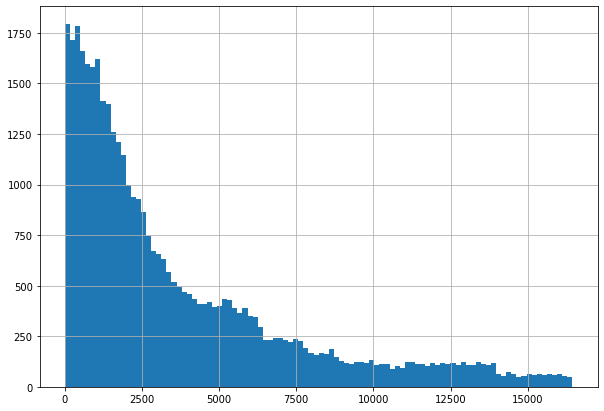

In [139]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

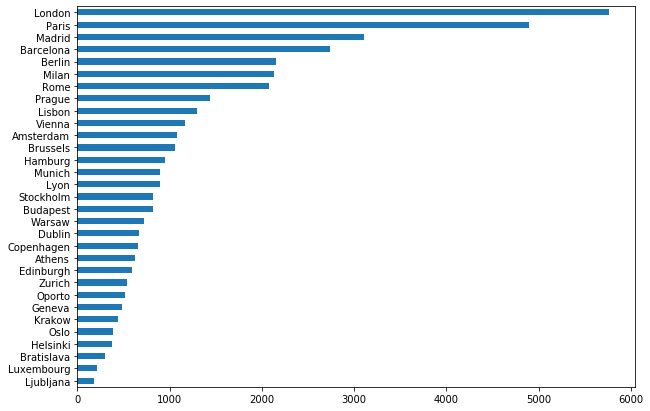

In [140]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

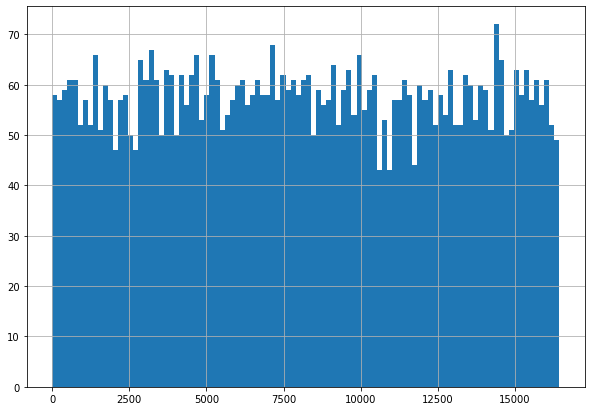

In [141]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

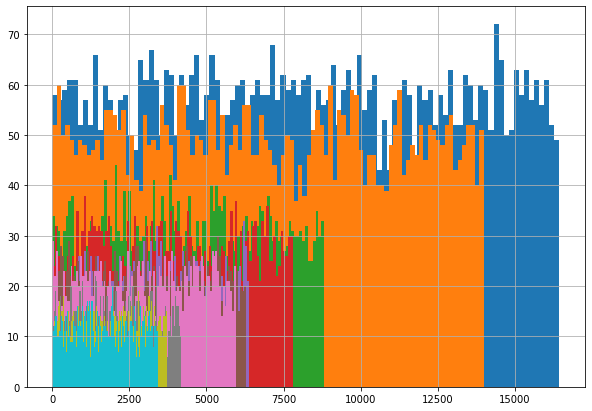

In [142]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

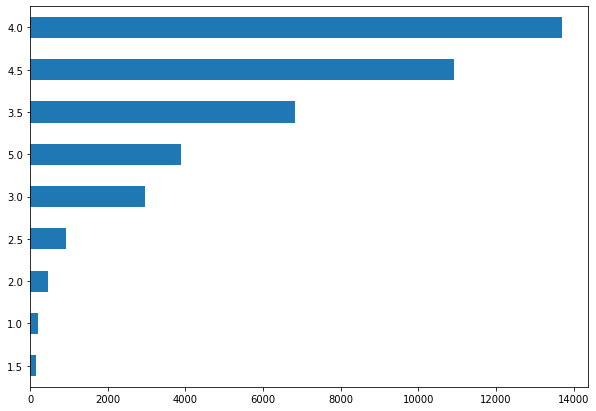

In [143]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

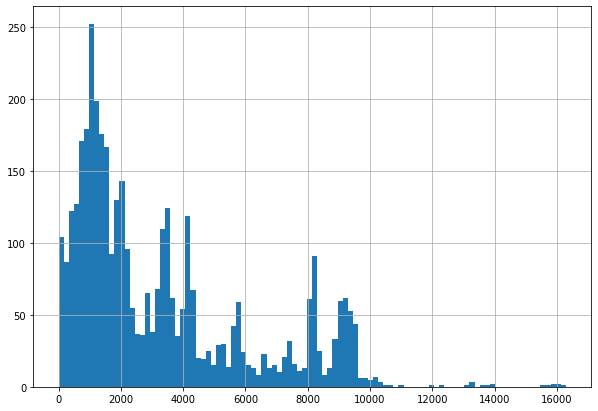

In [144]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

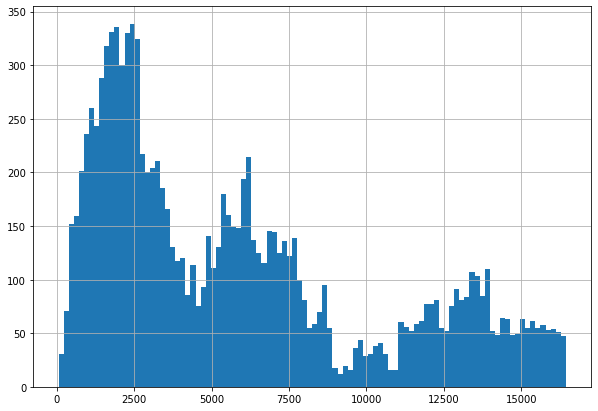

In [145]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

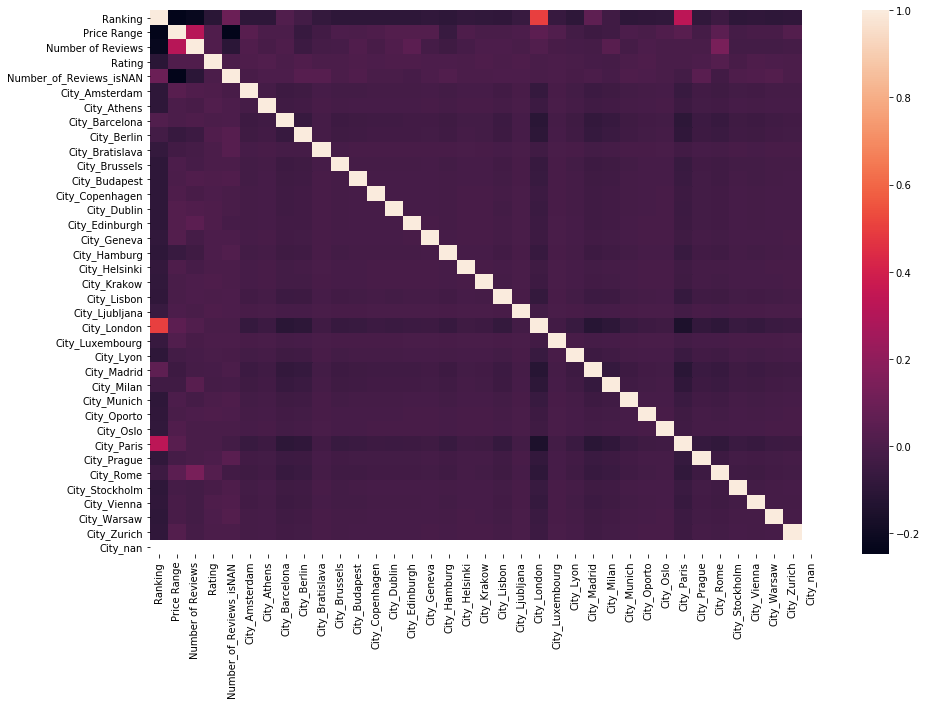

In [146]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [147]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [149]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    df_output.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    df_output['Number of Reviews'].fillna(0, inplace=True)
    #df_output['Number of Reviews'].fillna(df_output['Number of Reviews'].mean(), inplace=True)
    # тут ваш код по обработке NAN
    # ....
    
    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    df_output['City2']=df_output['City']
    df_output = pd.get_dummies(df_output, columns=['City'], dummy_na=True)
    # тут ваш код не Encoding фитчей
    # ....
    
    #df_output = pd.get_dummies(df_output, columns=['Price Range'],dummy_na=True)
    
    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    # ....
    #Добавим колонку с количеством ресторанов в городе
    dict_count_rest = df_output['City2'].value_counts().to_dict()
    df_output['count_rest'] = df_output['City2'].apply(get_count_rest_on_town,args=[dict_count_rest])    
    
    #Добавим колонку с количеством кухонь в ресторане
    df_output['Cuisine Style'] = df_output['Cuisine Style'].fillna('Nothing')    
    
    #Добавим новый думми фактор Cuisine Style
    df_output['Cuisine Style2'] = df_output['Cuisine Style'].apply(filter_cuisine_style2)
    df_output2 = df_output['Cuisine Style2'].str.get_dummies(',')        
    df_output = pd.concat([df_output, df_output2],sort=False,axis=1)

    #Добавим колонку с текущей датой для удобства вычислений
    d = datetime.date.today()
    df_output['datetime_today'] = d
    #Парсим колонку Reviews для того чтобы получить дату предыдущего отзыва 
    df_output['Reviews_first_date'] = df_output['Reviews'].apply(get_first_date_reviews)
    #Парсим колонку Reviews для того чтобы получить дату последнего отзыва
    df_output['Reviews_last_date'] = df_output['Reviews'].apply(get_last_date_reviews)
    #Преобразовывем тип полученных значений к типу дата 
    df_output['Reviews_first_date'] = pd.to_datetime(df_output['Reviews_first_date'])
    #Преобразовывем тип полученных значений к типу дата
    df_output['Reviews_last_date']  = pd.to_datetime(df_output['Reviews_last_date'])
    #Преобразовывем тип полученных значений к типу дата
    df_output['datetime_today']     = pd.to_datetime(df_output['datetime_today'])
    
    #Добавим новый фактор разница дней между текущей датой и последним отзывом
    df_output['delta_today_reviews_last_date'] = (df_output['datetime_today'] - df_output['Reviews_last_date']).dt.days
    #Добавим новый фактор разница дней между отзывами
    df_output['delta_last_date_first_date'] = (df_output['Reviews_last_date'] - df_output['Reviews_first_date']).dt.days        
    #Добавим новый фактор количество кухонных стилей в ресторане
    df_output['count_cuisine_style'] = df_output['Cuisine Style'].apply(filter_cuisine_style)
    df_output = pd.get_dummies(df_output, columns=['count_cuisine_style'], dummy_na=True)
    
    
    #Добавление этого фактора(длина строки отзыва )  ухудшала MAE поэтому от него отказался 
    #df_output['lenght_reviews'] = df_output['Reviews'].apply(get_lenght_reviews)
    
    #pf = PolynomialFeatures(2)
    #df_output['delta_today_reviews_last_date'].fillna(0).astype('float')
    #df_output['delta_last_date_first_date'].fillna(0).astype('float')        
    #pf.fit_transform(df_output[['delta_today_reviews_last_date', 'delta_last_date_first_date']])
    #df_output[['delta_today_reviews_last_date', 'delta_last_date_first_date']] = pf.fit_transform(df_output[['delta_today_reviews_last_date', 'delta_last_date_first_date']])
        
    #Для дальнейшего удаления колонок изменим тип на object    
    df_output['Reviews_first_date'] = df_output['Reviews_first_date'].astype('str')
    df_output['Reviews_last_date']  = df_output['Reviews_last_date'].astype('str')
    df_output['datetime_today']     = df_output['datetime_today'].astype('str')
    
    
    df_output = df_output.fillna(0)
    #df_output = df_output.fillna(df_output.median())
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [150]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Ranking,Number of Reviews,sample,Rating,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,City_Brussels,...,count_cuisine_style_6.0,count_cuisine_style_7.0,count_cuisine_style_8.0,count_cuisine_style_9.0,count_cuisine_style_10.0,count_cuisine_style_11.0,count_cuisine_style_13.0,count_cuisine_style_15.0,count_cuisine_style_21.0,count_cuisine_style_nan
44336,5256.0,29.0,1,4.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
646,69.0,739.0,0,0.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8743,2504.0,7.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5457,851.0,42.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46256,2915.0,15.0,1,4.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3961,386.0,1013.0,0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28237,1496.0,2.0,1,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27717,10014.0,272.0,1,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10274,6537.0,122.0,1,3.5,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22859,5428.0,5.0,1,4.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


count    50000.000000
mean       851.434640
std        586.823523
min          0.000000
25%          0.000000
50%       1038.000000
75%       1175.000000
max       4563.000000
Name: delta_today_reviews_last_date, dtype: float64

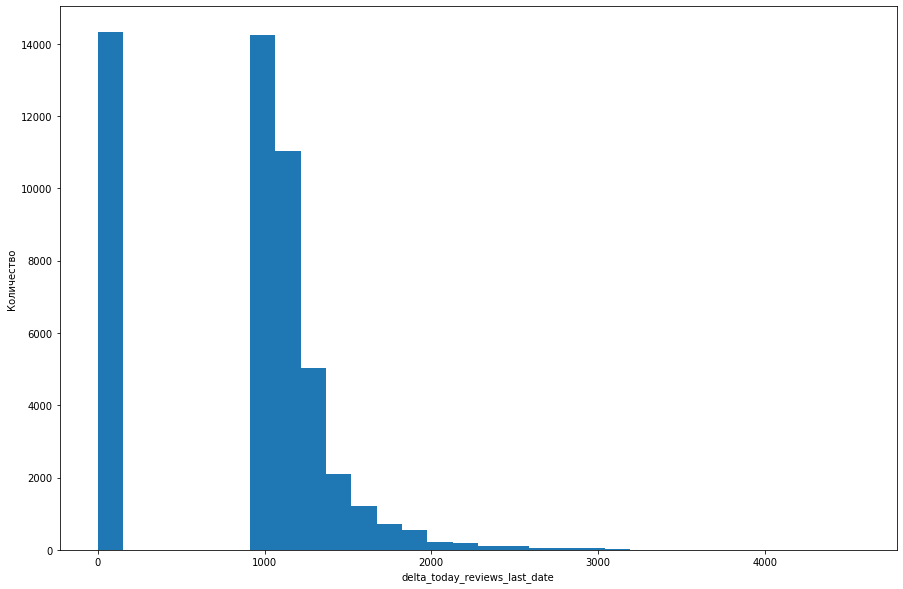

Границы выбросов -909.0 2612.0


Количество выбросов 92


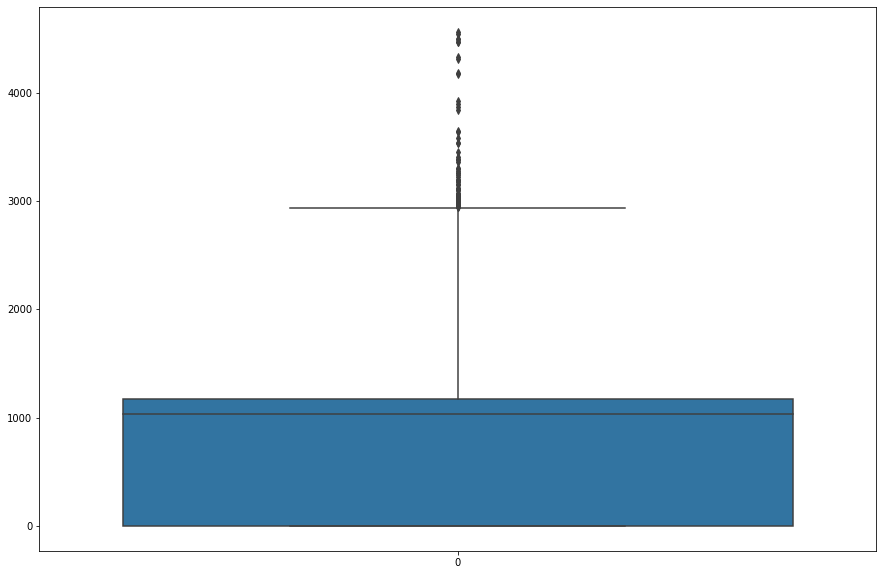

In [152]:
show_info_column(df_preproc, 'delta_today_reviews_last_date')

Выбросы оставлю как есть если удалить теряется много данных, а если их заполнить другими значениями то ухудшается MAE

count    50000.000000
mean        88.860000
std        204.366452
min       -362.000000
25%          0.000000
50%         18.000000
75%        102.000000
max       3296.000000
Name: delta_last_date_first_date, dtype: float64

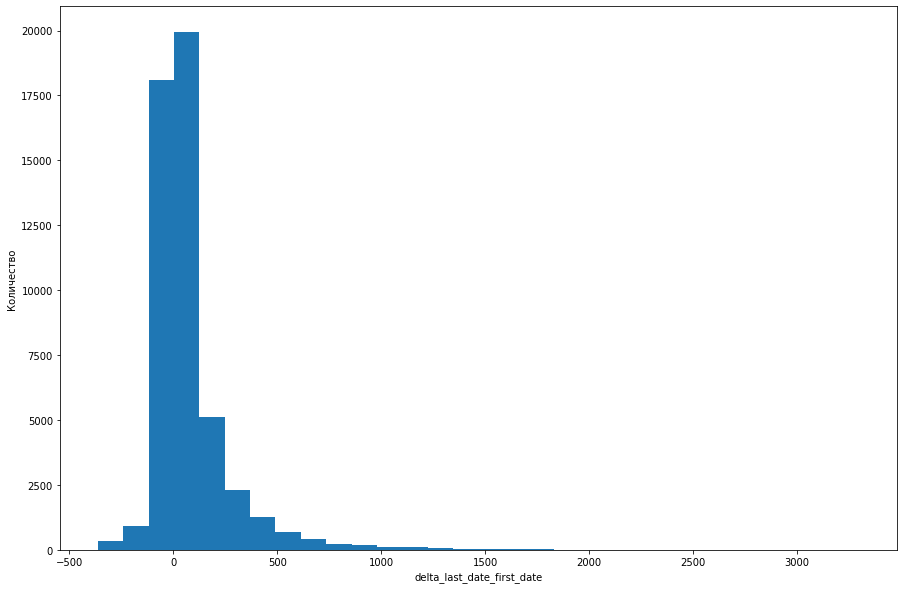

Границы выбросов -524.0 702.0


Количество выбросов 757


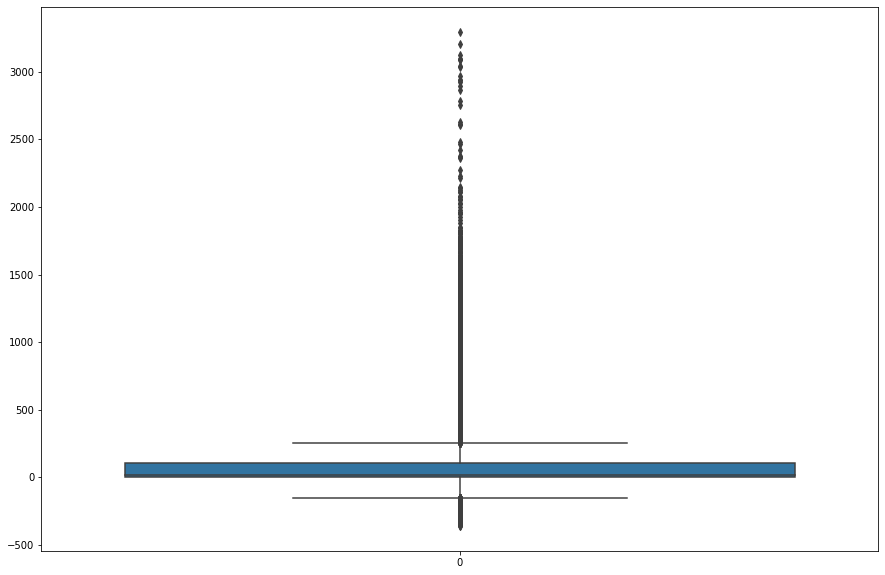

In [153]:
show_info_column(df_preproc, 'delta_last_date_first_date')

Выбросы оставлю как есть если удалить теряется много данных, а если их заполнить другими значениями то ухудшается MAE

Выбросы оставлю как есть если удалить теряется много данных, а если их заполнить другими значениями то ухудшается MAE

In [156]:
df_preproc = df_preproc.fillna(df_preproc.median())

In [157]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 287 entries, Ranking to count_cuisine_style_nan
dtypes: float64(5), int64(235), uint8(47)
memory usage: 93.8 MB


In [158]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [159]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [160]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 286), (40000, 286), (40000, 285), (32000, 285), (8000, 285))

# Model 
Сам ML

In [161]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [162]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [163]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.8min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


In [164]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20451624999999996


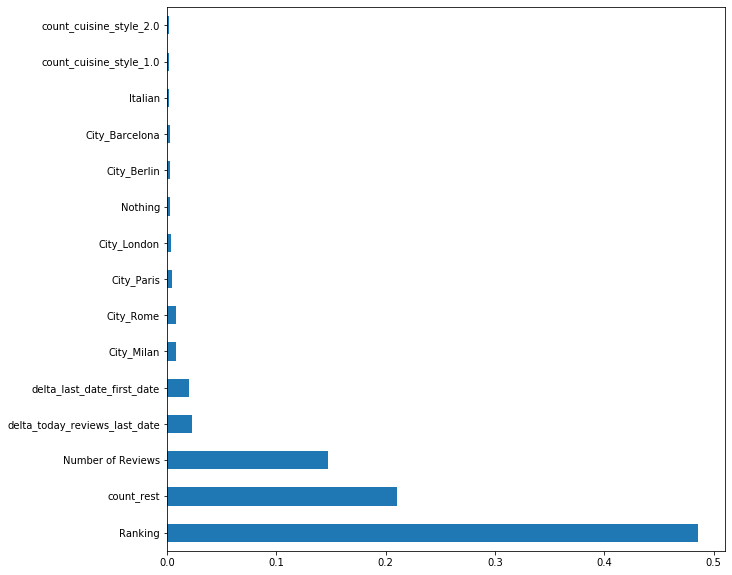

In [165]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [166]:
test_data.sample(10)

,Ranking,Number of Reviews,Rating,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,City_Brussels,City_Budapest,...,count_cuisine_style_6.0,count_cuisine_style_7.0,count_cuisine_style_8.0,count_cuisine_style_9.0,count_cuisine_style_10.0,count_cuisine_style_11.0,count_cuisine_style_13.0,count_cuisine_style_15.0,count_cuisine_style_21.0,count_cuisine_style_nan
5811,798.0,486.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3763,175.0,91.0,0.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5390,9438.0,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6456,3190.0,2.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4761,2779.0,7.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2966,2040.0,45.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4453,625.0,389.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5321,1551.0,23.0,0.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65,2846.0,3.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3418,1302.0,2.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [167]:
test_data = test_data.drop(['Rating'], axis=1)

In [168]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [169]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


In [170]:
predict_submission

array([3.   , 4.13 , 4.415, ..., 3.01 , 4.5  , 4.135])

In [171]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.000
1,id_1,4.130
2,id_2,4.415
3,id_3,4.305
4,id_4,4.435
5,id_5,4.430
6,id_6,2.130
7,id_7,2.395
8,id_8,4.070
9,id_9,4.670
